<a href="https://colab.research.google.com/github/machiwao/CCADMACL_PROJECT_COM222/blob/main/CCADMACL_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensinal Poverty Measures
Dataset Reference: https://www.kaggle.com/datasets/grosvenpaul/family-income-and-expenditure/data


In [568]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# Data Loading

In [569]:
df = pd.read_csv('https://raw.githubusercontent.com/machiwao/CCADMACL_PROJECT_COM222/refs/heads/main/Family%20Income%20and%20Expenditure.csv')
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,an

In [570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [571]:
df.isna().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [572]:
df.duplicated().sum()

np.int64(0)

# Feature Engineering

In [573]:
num_cols = df.select_dtypes(include=['int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median(numeric_only=True))
df[cat_cols] = df[cat_cols].fillna('Unknown')

print(df.isnull().sum())

Total Household Income                           0
Region                                           0
Total Food Expenditure                           0
Main Source of Income                            0
Agricultural Household indicator                 0
Bread and Cereals Expenditure                    0
Total Rice Expenditure                           0
Meat Expenditure                                 0
Total Fish and  marine products Expenditure      0
Fruit Expenditure                                0
Vegetables Expenditure                           0
Restaurant and hotels Expenditure                0
Alcoholic Beverages Expenditure                  0
Tobacco Expenditure                              0
Clothing, Footwear and Other Wear Expenditure    0
Housing and water Expenditure                    0
Imputed House Rental Value                       0
Medical Care Expenditure                         0
Transportation Expenditure                       0
Communication Expenditure      

In [574]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,an

In [575]:
df['Total Expenditure'] = df[['Total Food Expenditure', 'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure', 'Housing and water Expenditure', 'Medical Care Expenditure', 'Transportation Expenditure', 'Communication Expenditure', 'Education Expenditure', 'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure', 'Crop Farming and Gardening expenses']].sum(axis=1)

df['Essential Expenditure'] = df[['Total Food Expenditure', 'Housing and water Expenditure', 'Medical Care Expenditure', 'Transportation Expenditure', 'Clothing, Footwear and Other Wear Expenditure', 'Communication Expenditure', 'Education Expenditure']].sum(axis=1)

df['Non-Essential Expenditure'] = df[['Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure', 'Crop Farming and Gardening expenses']].sum(axis=1)

df['Total Income'] = df['Total Household Income'] + df['Total Income from Entrepreneurial Acitivites']

df['Savings'] = df['Total Income'] - df['Total Expenditure']


In [576]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)  
outlier_preds = iso.fit_predict(df[num_cols])

df['Outlier'] = outlier_preds  
print(df['Outlier'].value_counts())

Outlier
 1    39466
-1     2078
Name: count, dtype: int64


In [577]:
df_cleaned = df[df['Outlier'] == 1].drop(columns=['Outlier'])

print(f"Original dataset size: {df.shape}")
print(f"New dataset size after removing outliers: {df_cleaned.shape}")

Original dataset size: (41544, 66)
New dataset size after removing outliers: (39466, 65)


# Data Preprocessing

In [578]:
scaler = StandardScaler()
num_cols = df_cleaned.select_dtypes(include=['int64']).columns
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

In [579]:
encoder = LabelEncoder()
label_cols = ['Household Head Sex', 'Household Head Marital Status', 'Household Head Job or Business Indicator']
for col in label_cols:
    df_cleaned[col] = encoder.fit_transform(df_cleaned[col])

onehot = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
encoded_cols = onehot.fit_transform(df_cleaned[cat_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=onehot.get_feature_names_out(cat_cols))
df_cleaned = df_cleaned.drop(columns=(list(cat_cols) + label_cols)).reset_index(drop=True)
df_cleaned = pd.concat([df_cleaned, encoded_df], axis=1)

In [580]:
df_cleaned = df_cleaned.astype(np.float32)

In [581]:
from sklearn.decomposition import PCA

def best_num_components(data, variance_threshold=0.9):
    pca = PCA()
    pca.fit(data)
    cumulative_variance = pca.explained_variance_ratio_.cumsum()
    num_components = np.argmax(cumulative_variance >= variance_threshold) + 1
    return num_components, cumulative_variance, pca.explained_variance_ratio_

num_components = best_num_components(df_cleaned)
print(f"Number of components to keep 90% variance: {num_components}")


Number of components to keep 90% variance: (np.int64(42), array([0.2227832 , 0.29244798, 0.33684987, 0.37028834, 0.39903653,
       0.42740297, 0.4525765 , 0.47496316, 0.49708837, 0.5176545 ,
       0.5369633 , 0.5549917 , 0.5725948 , 0.589675  , 0.60589474,
       0.6214058 , 0.6368007 , 0.6520562 , 0.66672873, 0.6806072 ,
       0.6942277 , 0.70761657, 0.72075194, 0.7337837 , 0.7466332 ,
       0.758938  , 0.77107733, 0.78247494, 0.7936853 , 0.80468047,
       0.81529605, 0.82547444, 0.8350296 , 0.8443706 , 0.8535894 ,
       0.86215353, 0.87049073, 0.8783628 , 0.8860016 , 0.89223486,
       0.89780235, 0.9030972 , 0.9076755 , 0.91188544, 0.9158969 ,
       0.9197515 , 0.9232533 , 0.9266501 , 0.92974913, 0.9326356 ,
       0.9352043 , 0.93764144, 0.9400109 , 0.9421771 , 0.9441381 ,
       0.945931  , 0.9476492 , 0.94918144, 0.9506566 , 0.95209414,
       0.95352834, 0.9547877 , 0.95603853, 0.95725286, 0.95844245,
       0.9595666 , 0.9606233 , 0.96163815, 0.96264184, 0.9636259 ,
    

Number of components to keep 95% variance: 42


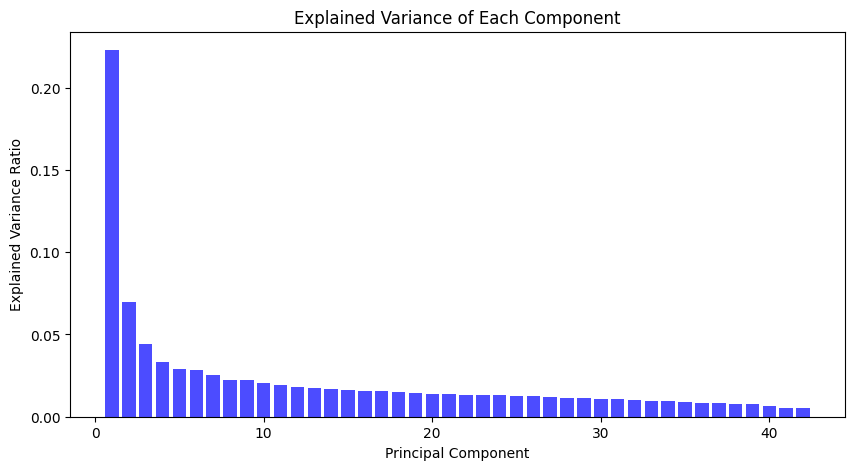

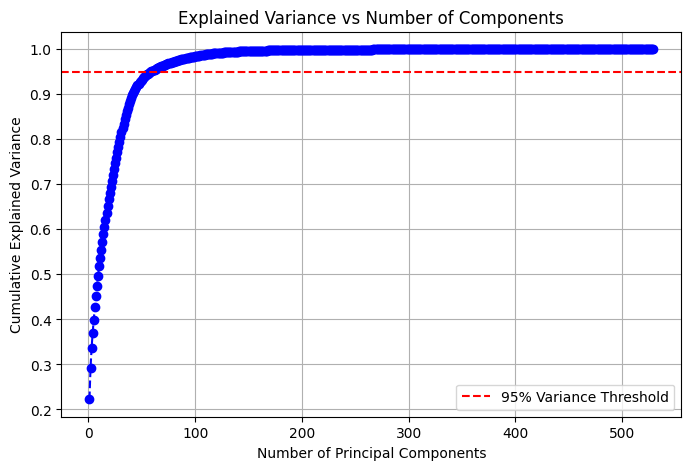

In [582]:
num_components, cumulative_variance, explained_variance = best_num_components(df_cleaned)
print(f"Number of components to keep 95% variance: {num_components}")

pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(df_cleaned)

plt.figure(figsize=(10, 5))
plt.bar(range(1, num_components + 1), explained_variance[:num_components], alpha=0.7, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Each Component')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.legend()
plt.show()

# Clustering Models

### K-Means Clustering

For K = 2, WCSS = 1668426.75, Silhouette Score = 0.2761
For K = 3, WCSS = 1576863.38, Silhouette Score = 0.1031
For K = 4, WCSS = 1522688.75, Silhouette Score = 0.0528
For K = 5, WCSS = 1483871.00, Silhouette Score = 0.0525
For K = 6, WCSS = 1449804.62, Silhouette Score = 0.0528
For K = 7, WCSS = 1419026.00, Silhouette Score = 0.0542
For K = 8, WCSS = 1393629.75, Silhouette Score = 0.0390
For K = 9, WCSS = 1370532.00, Silhouette Score = 0.0418
For K = 10, WCSS = 1339485.25, Silhouette Score = 0.0484


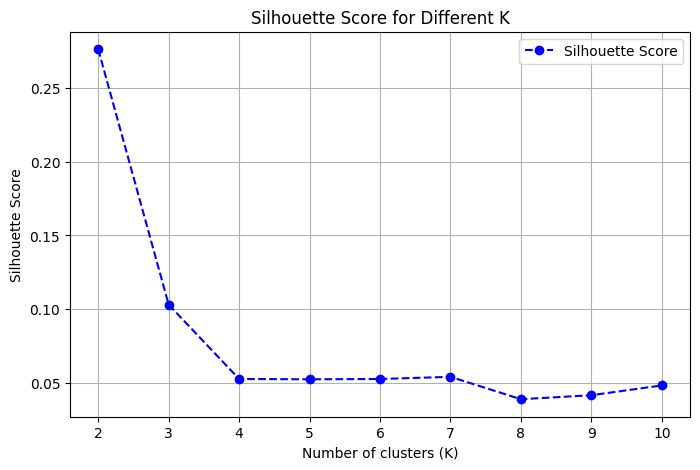

In [583]:
wcss = []
silhouette_scores = []
sse = {}

k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    
    wcss.append(kmeans.inertia_)
    sse[k] = kmeans.inertia_
    
    score = silhouette_score(X_pca, labels, metric='euclidean')
    silhouette_scores.append(score)
    
    print(f"For K = {k}, WCSS = {sse[k]:.2f}, Silhouette Score = {score:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='b', label="Silhouette Score")
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

In [584]:
from sklearn.cluster import DBSCAN

def find_best_dbscan_params(X, radius_range, min_samples_range):

    best_score = -1
    best_params = {}

    for radius in radius_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=radius, min_samples=min_samples)
            try:
                labels = dbscan.fit_predict(X)
                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                if n_clusters >= 2:
                    score = silhouette_score(X, labels)
                    if score > best_score:
                        best_score = score
                        best_params = {
                            "radius": radius,
                            "min_samples": min_samples,
                            "silhouette_score": score,
                            "n_clusters": n_clusters
                        }
            except ValueError as e:
                print(f"Error with radius={radius}, min_samples={min_samples}: {e}")

    return best_params

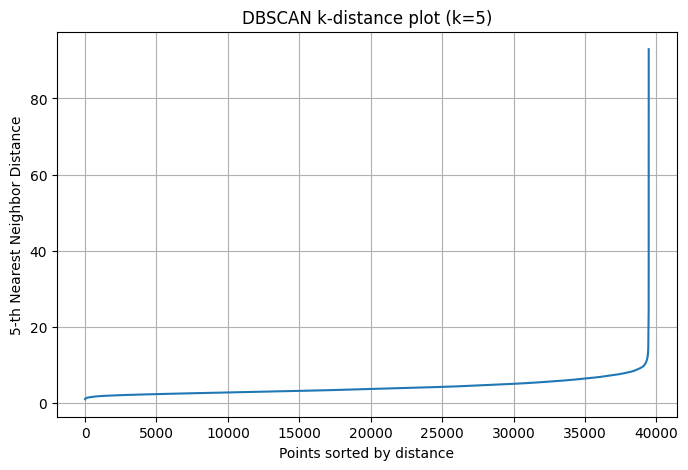

Suggested eps for DBSCAN: 6.5557


In [585]:
from sklearn.neighbors import NearestNeighbors

def find_optimal_eps(data, k=5):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    
    k_distances = np.sort(distances[:, k-1])

    plt.figure(figsize=(8, 5))
    plt.plot(k_distances)
    plt.xlabel("Points sorted by distance")
    plt.ylabel(f"{k}-th Nearest Neighbor Distance")
    plt.title(f"DBSCAN k-distance plot (k={k})")
    plt.grid(True)
    plt.show()

    return k_distances[int(len(k_distances) * 0.9)]  

optimal_eps = find_optimal_eps(X_pca, k=5)
print(f"Suggested eps for DBSCAN: {optimal_eps:.4f}")

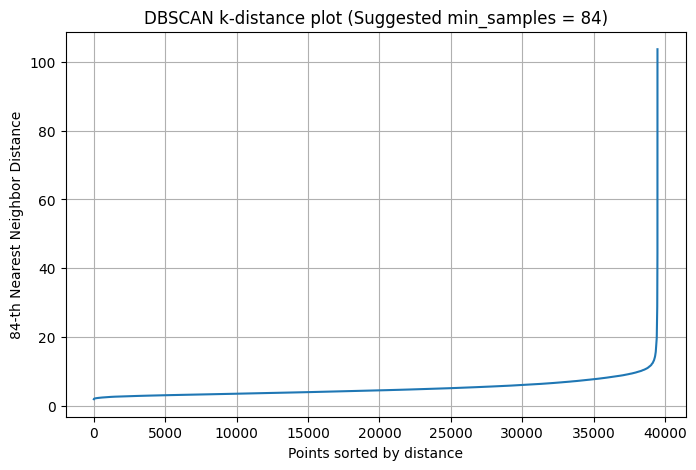

Suggested min_samples for DBSCAN: 84


In [586]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def find_best_min_samples(data):

    n_features = data.shape[1]
    suggested_min_samples = max(2, int(2 * n_features))  
    
    neigh = NearestNeighbors(n_neighbors=suggested_min_samples)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)

    k_distances = np.sort(distances[:, suggested_min_samples - 1])

    plt.figure(figsize=(8, 5))
    plt.plot(k_distances)
    plt.xlabel("Points sorted by distance")
    plt.ylabel(f"{suggested_min_samples}-th Nearest Neighbor Distance")
    plt.title(f"DBSCAN k-distance plot (Suggested min_samples = {suggested_min_samples})")
    plt.grid(True)
    plt.show()

    return suggested_min_samples

optimal_min_samples = find_best_min_samples(X_pca)
print(f"Suggested min_samples for DBSCAN: {optimal_min_samples}")

In [587]:
# radius_range = np.linspace(0.2, 0.3, 10)
# min_samples_range = range(2, 17)

# best_params = find_best_dbscan_params(X_pca, radius_range, min_samples_range)
# print(best_params)

In [588]:
db = DBSCAN(eps = optimal_eps, min_samples = optimal_min_samples)
model = db.fit(X_pca)
labels = db.labels_

print("Number of clusters:", len(set(labels)) - (1 if -1 in labels else 0))
print(f"Silhouette Score: {silhouette_score(X_pca, labels):.4f}")

Number of clusters: 2
Silhouette Score: 0.2547
